# Effects of Loan Characteristics on Loan Status, Credit Scores and APRs
## by Garainesu Hove

## Investigation Overview

In this investigation, I wanted to look at the characteristics of borrower and loans that could be used to predict their status, the parameters that affect the credit score and APR's of borrowers.

## Dataset Overview

The data consisted of attributes of approximately 115,000 loans. There are 81 attributes on each loan, but I focused only 14 of them in exploration. These are:

- Loan Status
- Lower Credit Score 
- Borrower APR
- Loan Category
- Borrower State
- Employment Status
- Employment Status Duration
- Borrower's Home Ownership
- Debt to Income Ratio
- Income Range
- Income Verifiableness
- Stated Monthly Income
- Original Loan Amount
- Monthly Loan Payment

I remove some of the data because of missing information. These are:

- I removed loan status "canceled" because there were only 5 loans which are canceled.
- I removed loan categories less than % 0.2 
- I removed employment status "Not available" since it is not informative.
- Finally, I removed "Not displayed" income range because it was not informative

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# convert numeric data to categorical data 
nums_to_cat = {"ListingCategory (numeric)":{0:"Not Available", 1:"Debt Consolidation", 2:"Home Improvement", 3:"Business",
                                            4:"Personal Loan", 5:"Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
                                            9:"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
                                            13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
                                            16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}}
loan.replace(nums_to_cat, inplace=True)

loan.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [4]:
# drop some data
loan.drop(loan[(loan.LoanStatus == "Cancelled")].index, inplace=True)
loan.drop(loan[(loan.ListingCategory == "RV")|(loan.ListingCategory == "Green Loans")|(loan.ListingCategory == "Cosmetic Procedure")|(loan.ListingCategory == "Boat")].index, inplace=True)
loan.drop(loan[(loan.EmploymentStatus == "Not available")].index, inplace=True)
loan.drop(loan[(loan.IncomeRange == 'Not employed')].index, inplace=True)
loan.drop(loan[(loan.IncomeRange == 'Not displayed')].index, inplace=True)

## Proportion of Loan Status

About half of the loans' one or more payments have been completed and no payments are past due. About 1/3 of the loans are completed. The %2 of loan's payments are past due. The rest are failed to be paid (defaulted or chargedoff) 

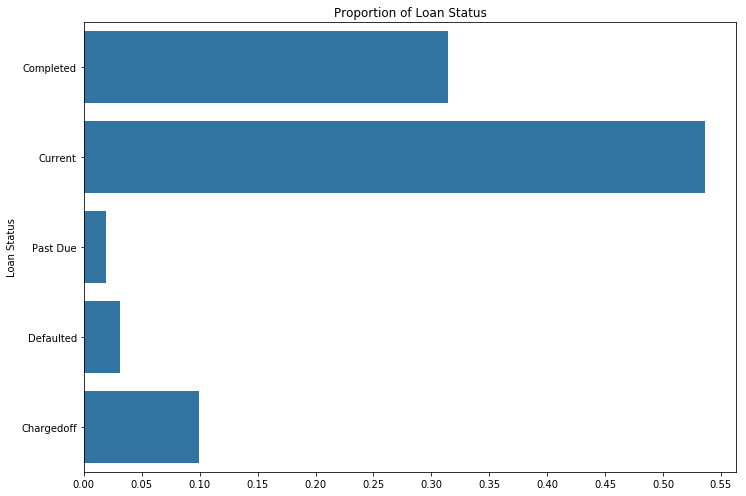

In [5]:
# Replace all Past Due (..days) values with Past Due to reduce visualization complexity using .replace 
loan['LoanStatus']=loan['LoanStatus'].replace(['Past Due (1-15 days)', 
                                               'Past Due (16-30 days)',
                                               'Past Due (31-60 days)',
                                               'Past Due (61-90 days)',
                                               'Past Due (91-120 days)',
                                               'Past Due (>120 days)'],'Past Due')
# FinalPaymentInProgress is not a completed loan status, we can count this as Current  
loan['LoanStatus']=loan['LoanStatus'].replace('FinalPaymentInProgress', 'Current')

''' I ordered the loan status in terms of my understanding of success of the Loan. This may be subjective, 
    however, I guess it is better than ordered visualization'''

level_order = ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loan['LoanStatus'] = loan['LoanStatus'].astype(ordered_cat)

# get proportion taken by most common group for derivation of tick marks
n_points = loan.shape[0]
cat_counts = loan['LoanStatus'].value_counts()
max_count = cat_counts.max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize = [11.69, 8.27])
default_color = sb.color_palette()[0];

# use bar chart as it is categorical variable.
sb.countplot(data = loan, y = 'LoanStatus',color = default_color);
plt.xlabel('');
plt.ylabel('Loan Status');
plt.title('Proportion of Loan Status')
plt.xticks(tick_props * n_points, tick_names);

## Distribution of Borrower APR

Borrower APR's in the dataset take on values about 0.0 at the lowest, to about 0.42 at the highest. There are spikes around borrower APR of 0.1, 0.2, 0.3 and 0.35 with 0.35 is largest. The distribution of Borrower APR takes on a multimodal shape.

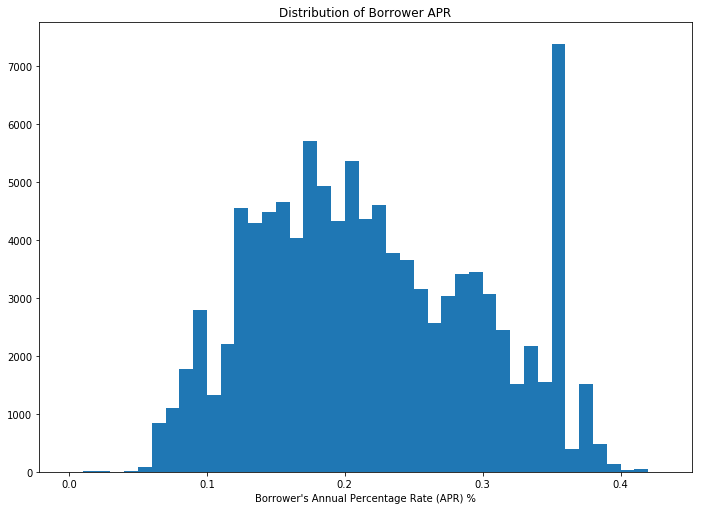

In [6]:
plt.figure(figsize = [11.69, 8.27])
binsize = 0.01;
bins = np.arange(0, loan['BorrowerAPR'].max()+binsize, binsize);

# use histogram as it is a numerical variable. 
plt.hist(data=loan,x='BorrowerAPR',bins=bins);
plt.xlabel("Borrower's Annual Percentage Rate (APR) %");
plt.title('Distribution of Borrower APR');

## Distribution of Credit Score Range Lower
Credit scores in the dataset take on values about 420 at the lowest, to about 880 at the highest. The distribution of Borrower APR takes on a multimodal shape one mode is around 500 other is around 700.

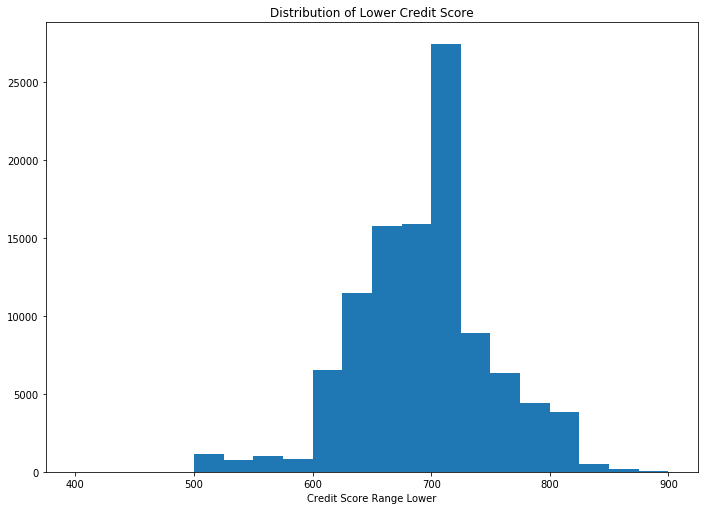

In [7]:
plt.figure(figsize = [11.69, 8.27])

# select a proper bin size, remove credit scores less than 400
binsize = 25;
bins = np.arange(400, loan['CreditScoreRangeLower'].max()+binsize, binsize);

# use histogram as it is a numerical variable. 
plt.hist(data=loan,x='CreditScoreRangeLower',bins=bins);
plt.xlabel("Credit Score Range Lower");
plt.ylabel('');
plt.title('Distribution of Lower Credit Score');


## Loan Status vs. Income Range

Proportion of loans and income range shows that highest defaulted and chargedoff rates are in lower income ranges and highest completed rates are in higher income ranges.

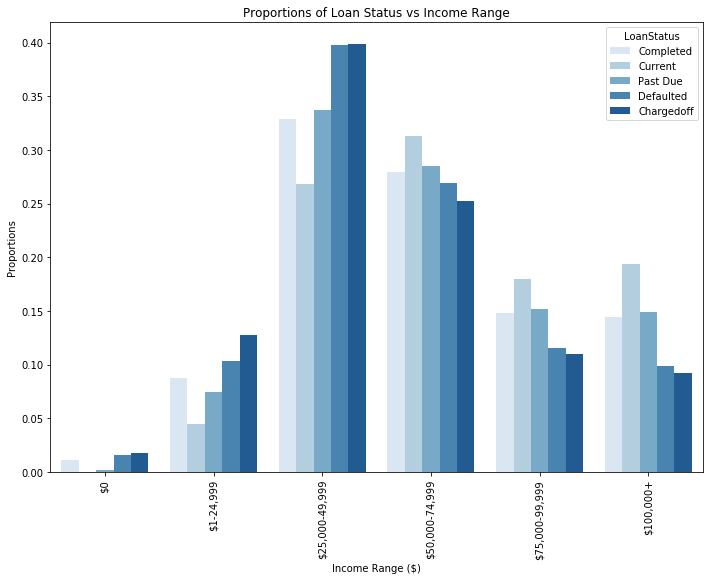

In [8]:
plt.figure(figsize = [11.69, 8.27])

# show proportions instead of counts in y axis.
prop_loan= (loan["IncomeRange"]
           .groupby(loan["LoanStatus"])
           .value_counts(normalize=True)
           .rename("Proportions")
           .reset_index());
# order income ranges from lowest to highest 
level_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
prop_loan['IncomeRange'] = prop_loan['IncomeRange'].astype(ordered_cat)

# use clustered bar chart as both of the variables are categorical.
sb.barplot(x='IncomeRange', y='Proportions', hue='LoanStatus', data=prop_loan, palette = 'Blues');
plt.xticks(rotation = 90);
plt.xlabel('Income Range ($)');
plt.title ('Proportions of Loan Status vs Income Range');

## Original Amount of Loan vs Borrower APR 
As Original Amount of Loan increases Borrower APR decreases. However the variation of Borrower APR decreases as Original Amount of Loan increases, too. The values are stacked on multiples of 5000.

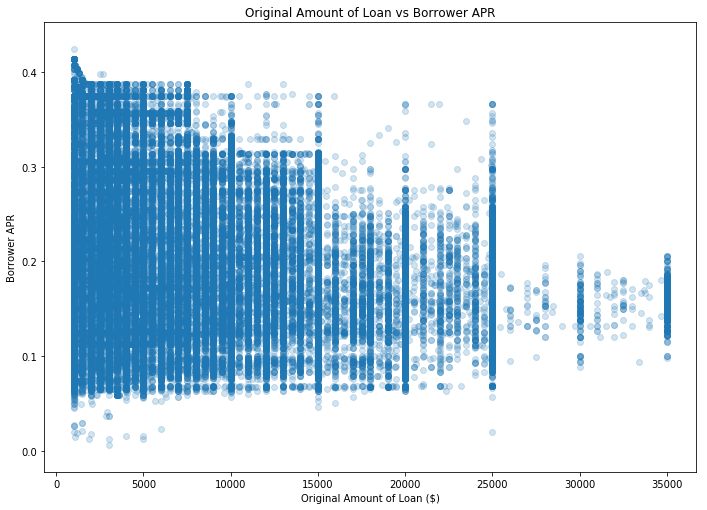

In [9]:
plt.figure(figsize = [11.69, 8.27])
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/5);
plt.xlabel('Original Amount of Loan ($)');
plt.ylabel('Borrower APR');
plt.title('Original Amount of Loan vs Borrower APR');

## Original Amount of Loan vs Lower Credit Score 
As Credit Score increases Original Amount of Loan increases too. Again, variation of Credit Scores decreases as Original Amount of Loan increases. The values, again are stacked on multiples of 5000.

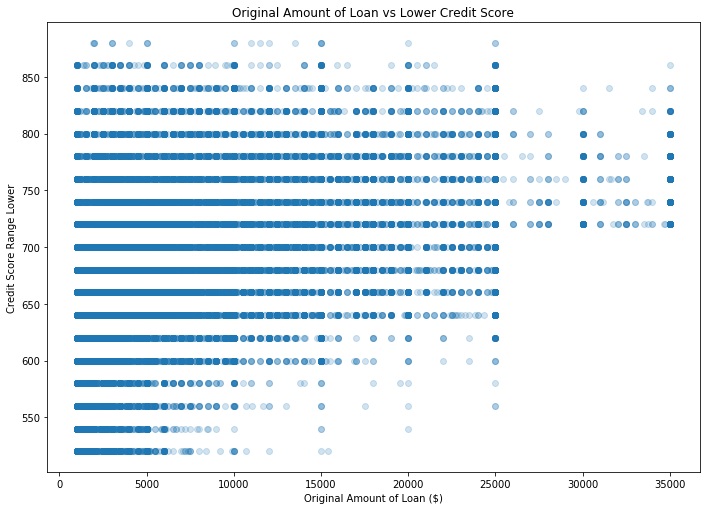

In [10]:
plt.figure(figsize = [11.69, 8.27])
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', alpha = 1/5);
plt.xlabel('Original Amount of Loan ($)');
plt.ylabel('Credit Score Range Lower');
plt.title('Original Amount of Loan vs Lower Credit Score');

## Lower Credit Score and Borrower APR by Loan Status
For Loan Status "Completed" and "Current", Lower Credit Score tend to be higher and Borrower APR is lower.

In [11]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.5+0.02, 0.02)
    bins_y = np.arange(0, 1000+10, 10)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

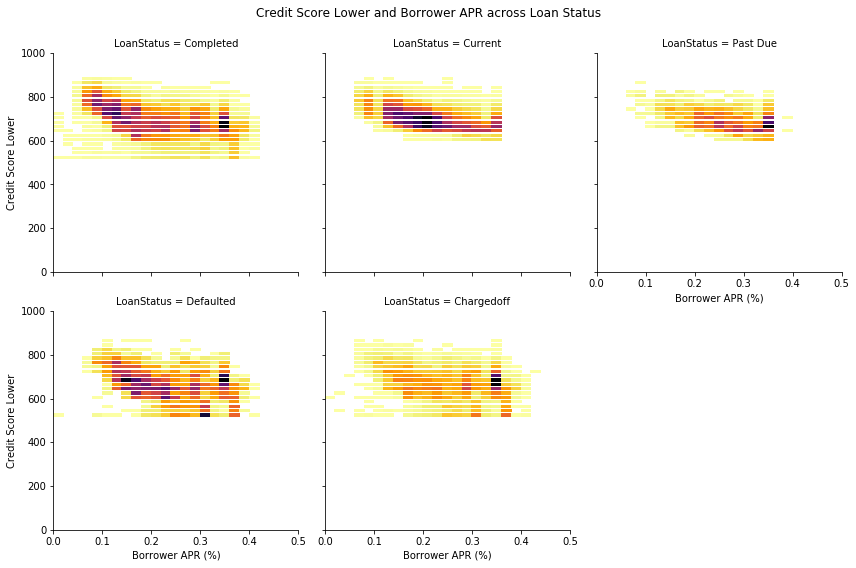

In [12]:
# create faceted heat maps on Loan Status types
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Credit Score Lower')

# add title at the top
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Credit Score Lower and Borrower APR across Loan Status');
plt.show()

## Lower Credit Score and Borrower APR by Home Ownerness
Home owner borrowers tend to have lower borrower APR's and higher credit scores.

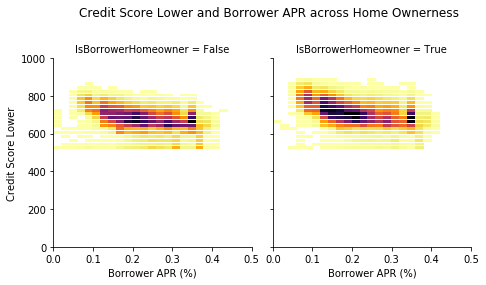

In [13]:
# create faceted heat maps on Borrower Home Ownership
g = sb.FacetGrid(data = loan, col = 'IsBorrowerHomeowner', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Credit Score Lower')

# add title at the top
plt.subplots_adjust(top=0.8,left=0.25);
g.fig.suptitle('Credit Score Lower and Borrower APR across Home Ownerness');
plt.show()

## Lower Credit Score and Borrower APR by Income Verifiableness
Borrowers with income verifiable tend to have lower borrower APR's.

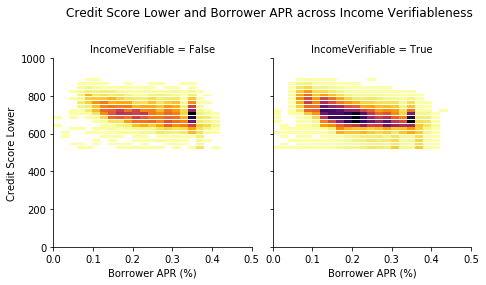

In [14]:
# create faceted heat maps on income verifiableness
g = sb.FacetGrid(data = loan, col = 'IncomeVerifiable', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Credit Score Lower')

# add title at the top
plt.subplots_adjust(top=0.8,left=0.25);
g.fig.suptitle('Credit Score Lower and Borrower APR across Income Verifiableness');

plt.show()

## Lower Credit Score and Borrower APR by Income Range
Except income range 0, as income increases borrower APR tend to decrease.

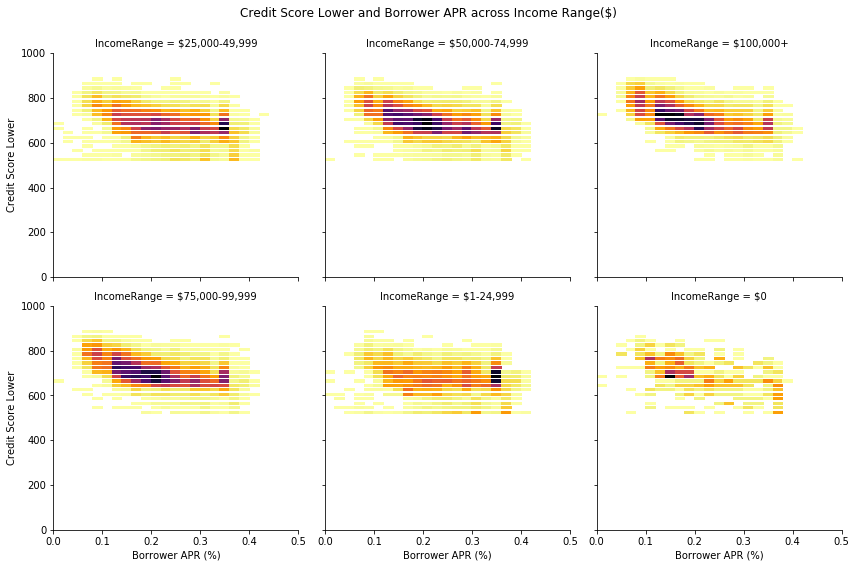

In [15]:
level_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
prop_loan['IncomeRange'] = prop_loan['IncomeRange'].astype(ordered_cat)

# create faceted heat maps on levels of the income range
g = sb.FacetGrid(data = loan, col = 'IncomeRange', col_wrap = 3, height = 4)
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeLower', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Credit Score Lower')

# add title at the top
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Credit Score Lower and Borrower APR across Income Range($)');

plt.show()